In [ ]:

#https://colab.research.google.com/github/Labelbox/labelbox-python/blob/develop/examples/basics/basics.ipynb#scrollTo=indie-bracket

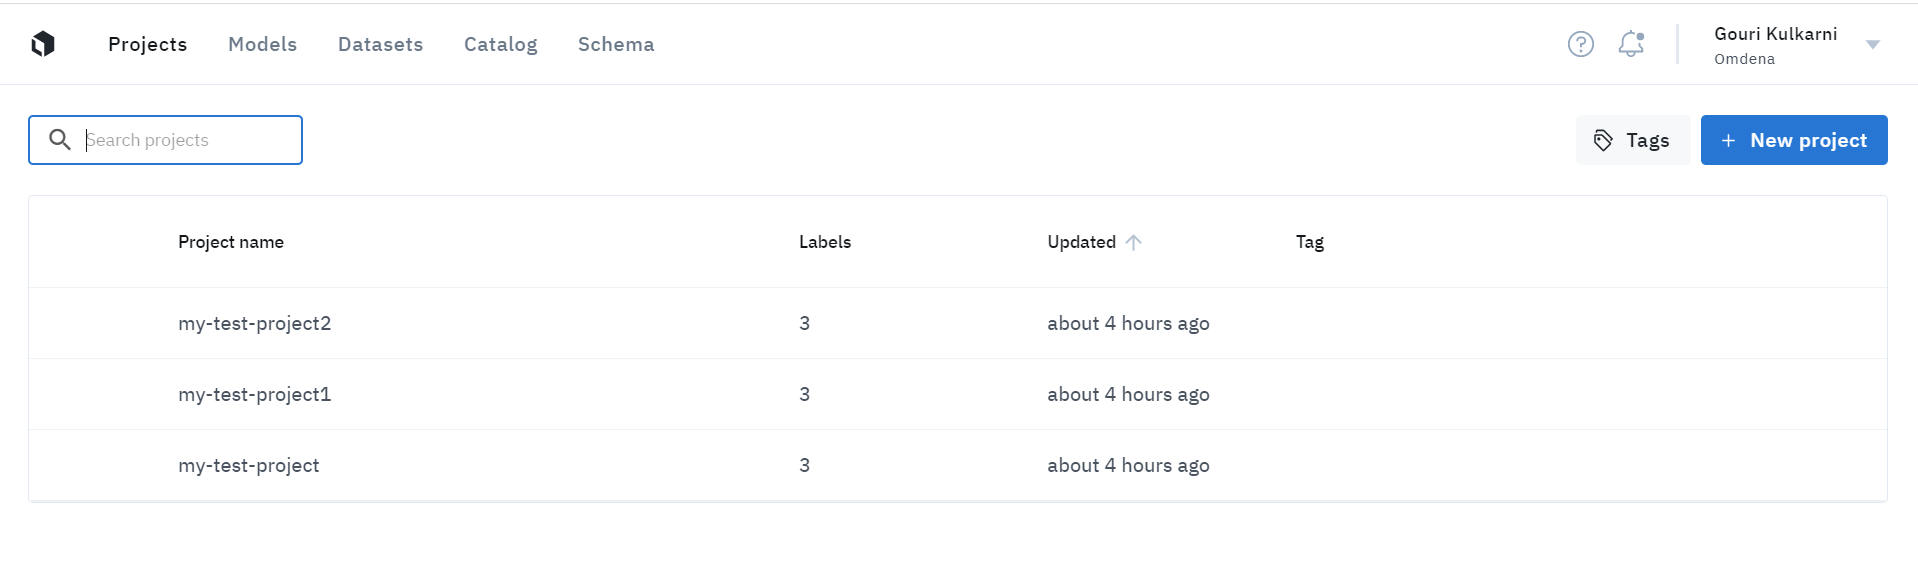

In [ ]:
!pip install labelbox

In [ ]:
from labelbox import Project, Dataset, Client, DataRow, OntologyBuilder, Tool, Option, Classification
import os
import labelbox as lb

Creating a new project 
Get the API key 


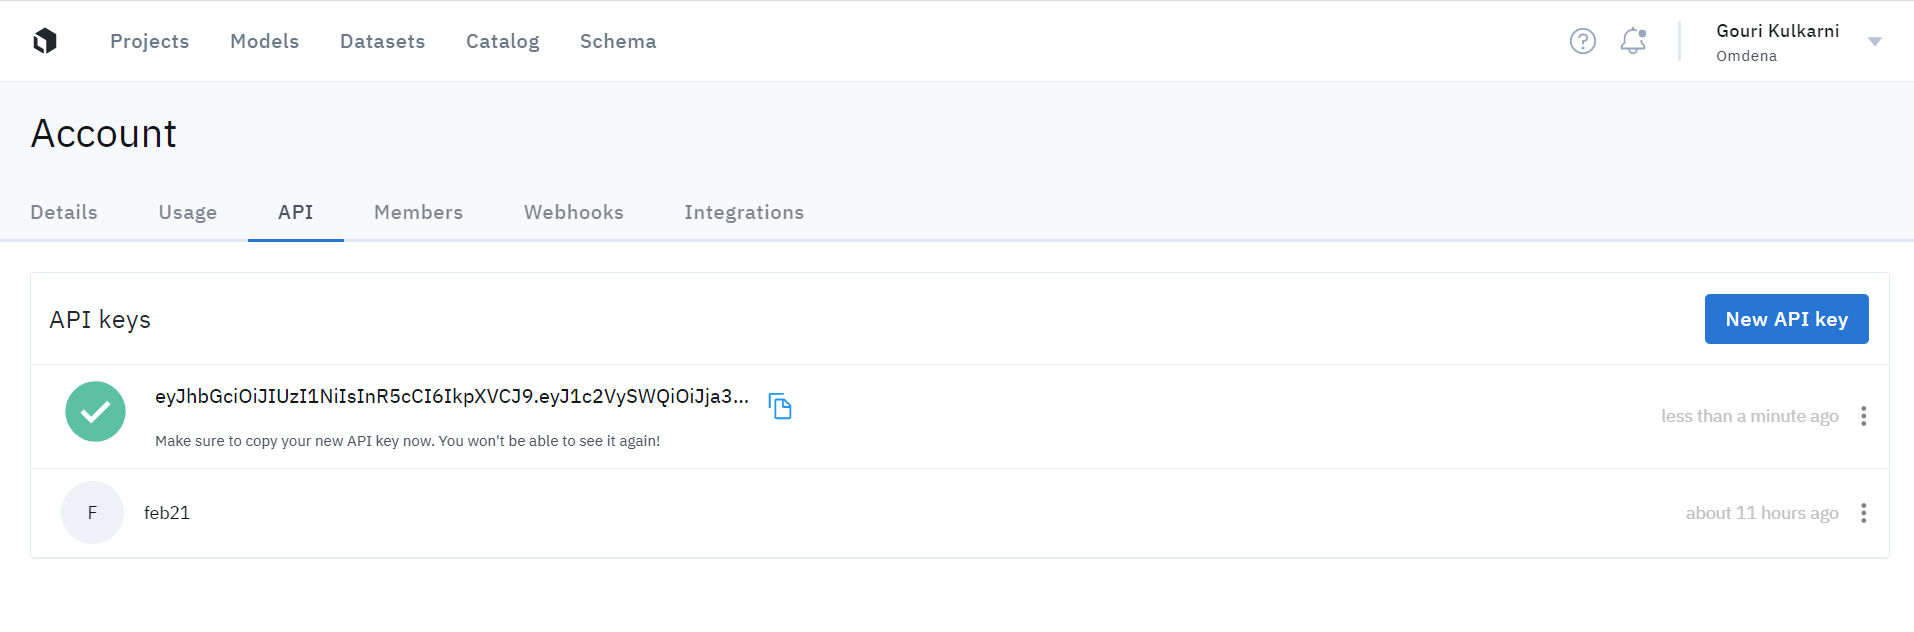

In [ ]:
# Add your api key
API_KEY = ""
client = Client(api_key=API_KEY)

List current projects and datasets on this account 

In [ ]:
projects = client.get_projects()
for project in projects:
  print(project.name, '\t', project.uid)

my-test-project3 	 ckzxiwnb91j6b0zc7czv8am04
my-test-project2 	 ckzxaes90462x0za6hc1i8x1r
my-test-project1 	 ckzx9t1bk428n0zbjfdh66jcf
my-test-project 	 ckzx7b0is3m240zbj70khgx8t


In [ ]:
datasets = client.get_datasets()
for dataset in datasets:
  print(dataset.name, '\t', dataset.uid)

In [ ]:
#to delete datasets
#for dataset in datasets:
#  print(dataset.name, '\t', dataset.delete())

In [ ]:
#to delete projects
#projects = client.get_projects()
#for project in projects:
#  print(project.name, '\t', project.delete())

Start new project 


In [ ]:
#Creates an empty project
project = client.create_project(name="my-test-project4",
                                description="a description")

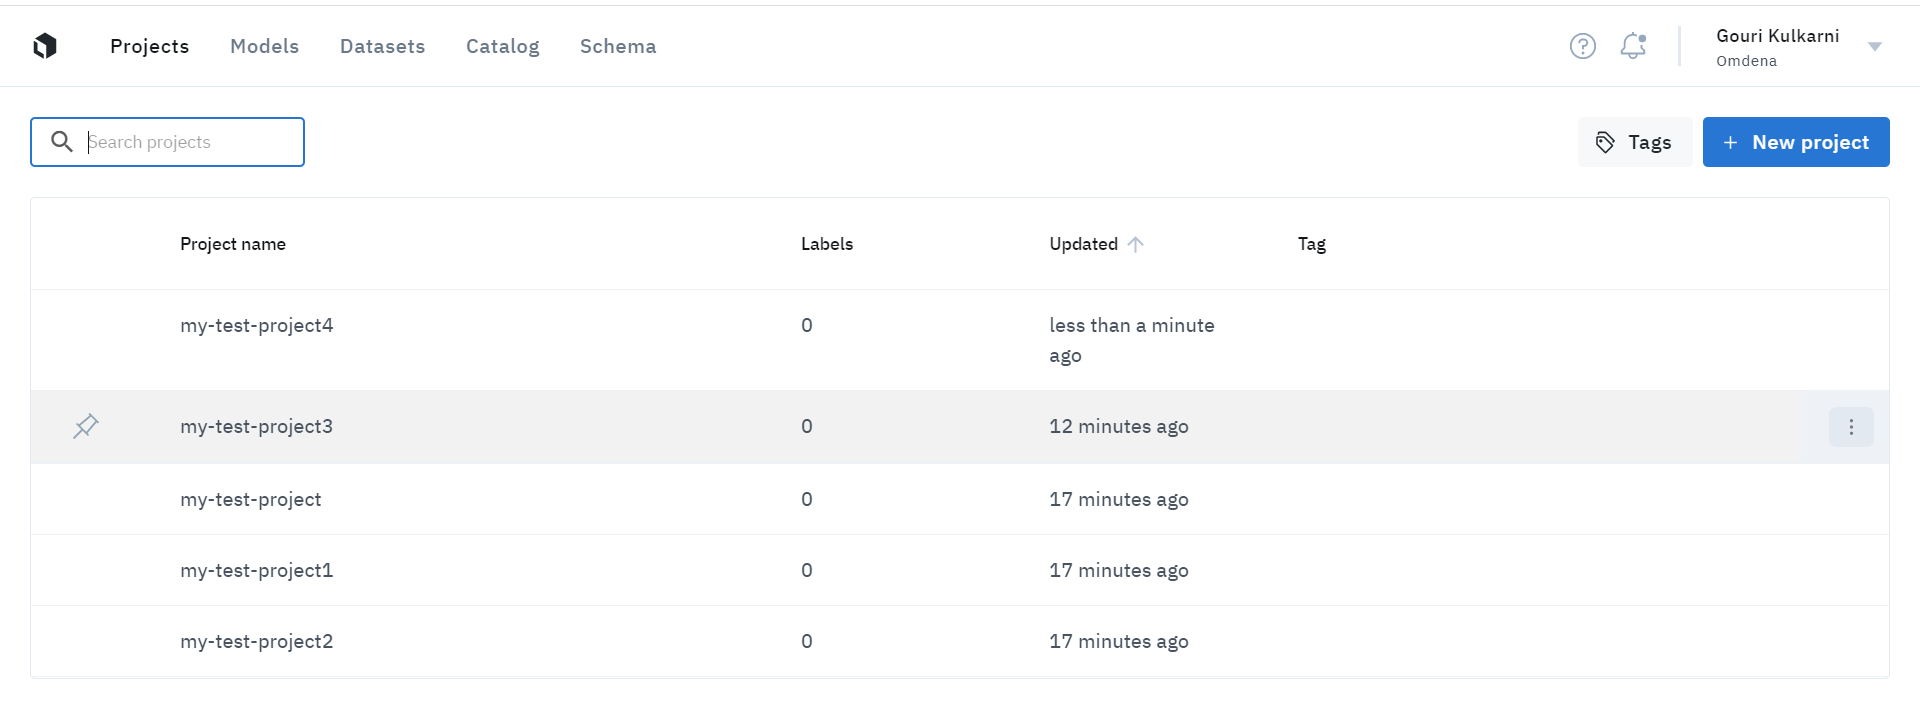

In [ ]:
#Note the project is not setup (so a lot of these fields are empty). Follow the project setup workflow
print("Project is not setup yet:", project.setup_complete is None)
print("Project name:", project.name)
print("Project description:", project.description)
print("Dataset:", list(project.datasets()))
print(project.ontology().normalized)
#print("Reviews:", project.reviews())
print("Benchmarks:", project.benchmarks())

Project is not setup yet: True
Project name: my-test-project4
Project description: a description
Dataset: []
{'tools': [], 'classifications': []}
Benchmarks: <labelbox.pagination.PaginatedCollection object at 0x7fe844508090>


Create a dataset 

Connect project to dataset 

List datasets 

In [ ]:
#Attach dataset
ds = client.create_dataset(name="test-ds")
project.datasets.connect(ds)
print([ds.name for ds in project.datasets()])

['test-ds']


In [ ]:
datasets = client.get_datasets()
for dataset in datasets:
  print(dataset.name, '\t', dataset.uid)

test-ds 	 ckzxjh3p81nxr0zbna5gv5r56


In [ ]:
projects = client.get_projects()
for project in projects:
  print(project.name, '\t', project.uid)

my-test-project4 	 ckzxjch3y1n1x0zbn5m50eg0p
my-test-project3 	 ckzxiwnb91j6b0zc7czv8am04
my-test-project2 	 ckzxaes90462x0za6hc1i8x1r
my-test-project1 	 ckzx9t1bk428n0zbjfdh66jcf
my-test-project 	 ckzx7b0is3m240zbj70khgx8t


Create data rows 

A data  row is one piece of text which we want to label




In [ ]:
# We can see the data rows associated with a dataset
data_rows = dataset.data_rows()
#next(data_rows)  # Print first one
data_rows
#none at the moment 

Read in the CSV ( text column ) 

In [ ]:
#csv to df 
import json
import pandas as pd 
df = pd.read_csv('/content/drive/MyDrive/latam/twitter/@AztecaNoticias_tweets.csv')


In [ ]:
df.head()

,id,created_at,text
0,1494833258776907780,2022-02-19 00:36:36,.@LaAgenciaCDMX y @SSaludCdMx informan que el ...
1,1494831777072009222,2022-02-19 00:30:42,Se llevará a cabo un programa de actividades p...
2,1494831610365100033,2022-02-19 00:30:03,#AlertaVialFIA | Un taxi chocó contra el Tren ...
3,1494831531579346946,2022-02-19 00:29:44,El Senado aprobó en comisiones la minuta que e...
4,1494827100825608195,2022-02-19 00:12:08,"Ignacio Mier, líder de Morena en la Cámara de ..."


In [ ]:
df.shape

(3250, 3)

In [ ]:
#df1 = df.sample(3)

In [ ]:
#df1.to_csv('/content/drive/MyDrive/latam/labelling/input_csv.csv')

In [ ]:
#for index, row in df.iterrows():
#     dataset.create_data_row(row_data=row['text'])

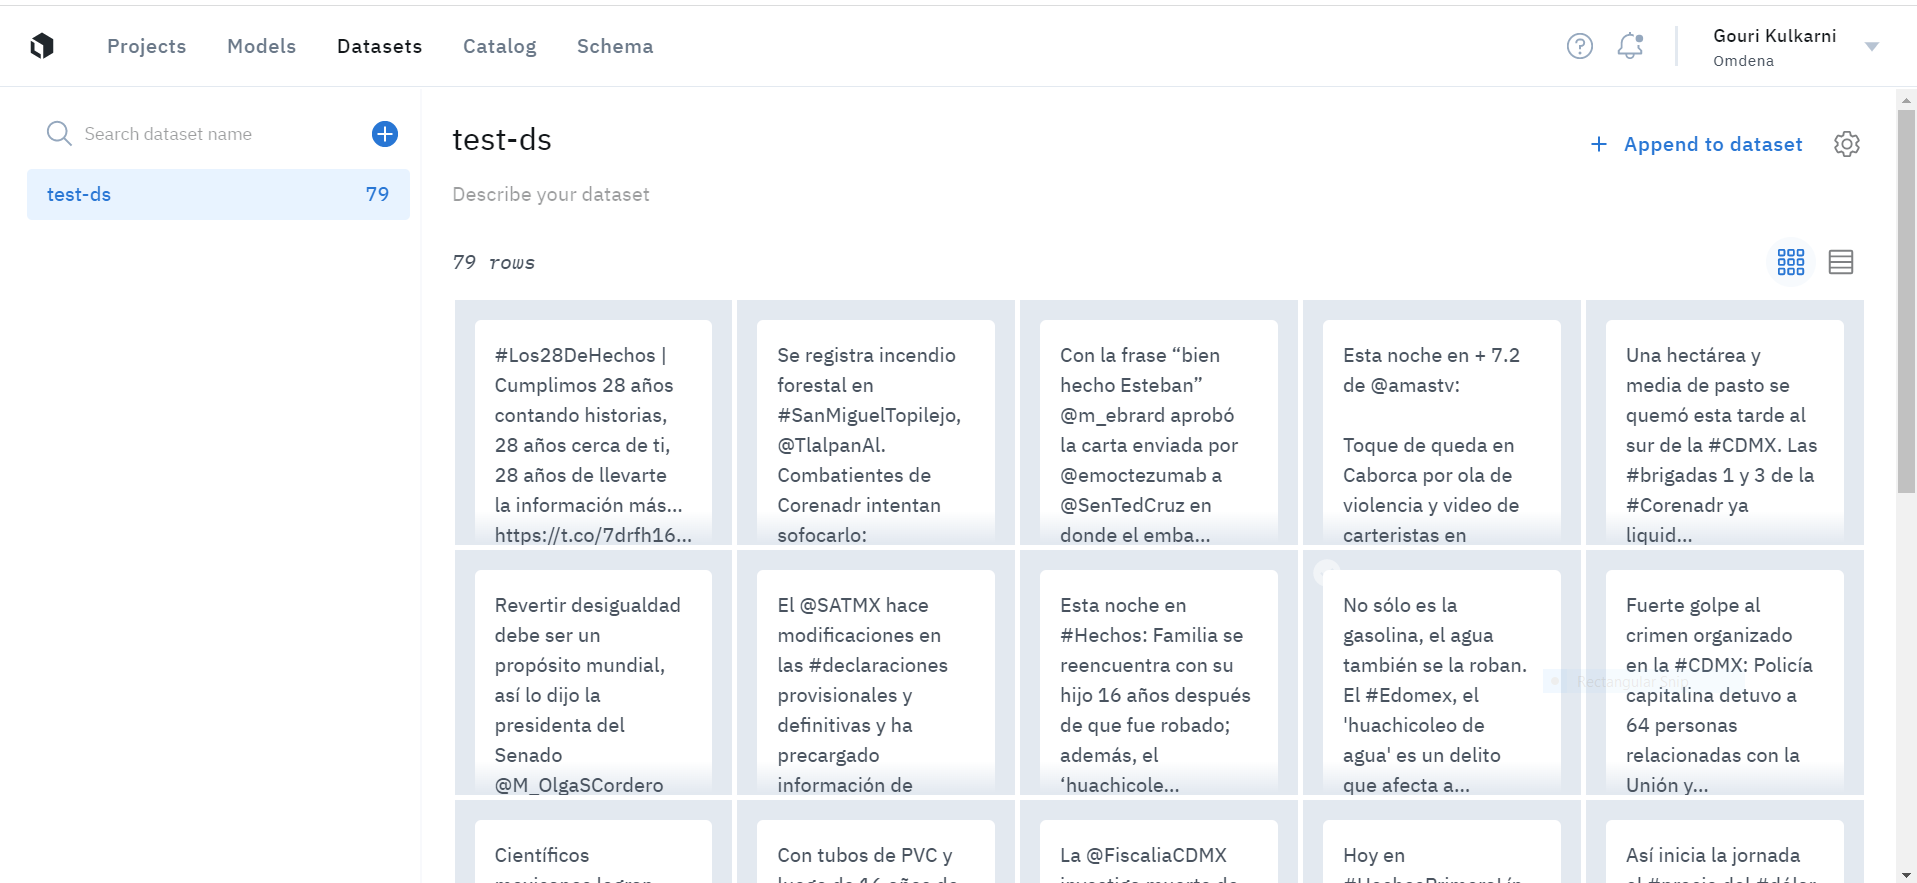

When a user creates a project with client.create_project() the project is not ready for labeling.

An ontology must be set


An ontology is a collection different tools and classifications that can be used within a project's editor. Each tool or classification is called a "Feature Schema".

Feature Schemas contain information about the tool such as the kind, the name, all subclasses, and other information related to a tool. Feature Schemas can be shared between ontologies.

In [ ]:


projects = client.get_projects()
for project in projects:
  if (project.name == "my-test-project4"):
    project.datasets.connect(ds)
    print(project.name, '\t', project.uid)
    datasets = client.get_datasets()
    for dataset in datasets:
      print(dataset.name, '\t', dataset.uid)
    #project.setup_editor(ontology)


  dropdown_classification = Classification(
    class_type=Classification.Type.DROPDOWN,
    instructions="fake/notfake",
    options=[Option("fake"), Option("not fake")])


  ontology_builder = OntologyBuilder()

# Append tools
  tool_fake = Tool(tool=Tool.Type.NER, name="fake")
  ontology_builder.add_tool(tool_fake)

  ontology = client.create_ontology("ontology-builder-ontology",
                                  ontology_builder.asdict())
  print(json.dumps(ontology.normalized, indent=2))

  project.setup_editor(ontology)


my-test-project4 	 ckzxjch3y1n1x0zbn5m50eg0p
test-ds 	 ckzxjh3p81nxr0zbna5gv5r56
{
  "tools": [
    {
      "schemaNodeId": "ckzxly47j25rf10dbd9qa9s55",
      "featureSchemaId": "ckzxly47i25re10dbdk1aehe6",
      "required": false,
      "name": "fake",
      "tool": "named-entity",
      "color": "#ff0000",
      "archived": 0,
      "classifications": []
    }
  ],
  "classifications": [],
  "relationships": []
}
{
  "tools": [
    {
      "schemaNodeId": "ckzxly5vn01ip0zby1jer8zml",
      "featureSchemaId": "ckzxly5vn01io0zby32h57wsa",
      "required": false,
      "name": "fake",
      "tool": "named-entity",
      "color": "#ff0000",
      "archived": 0,
      "classifications": []
    }
  ],
  "classifications": [],
  "relationships": []
}
{
  "tools": [
    {
      "schemaNodeId": "ckzxly6q8037r0zcof99p8pwq",
      "featureSchemaId": "ckzxly6q8037q0zcoc31se1pe",
      "required": false,
      "name": "fake",
      "tool": "named-entity",
      "color": "#ff0000",
      "archive

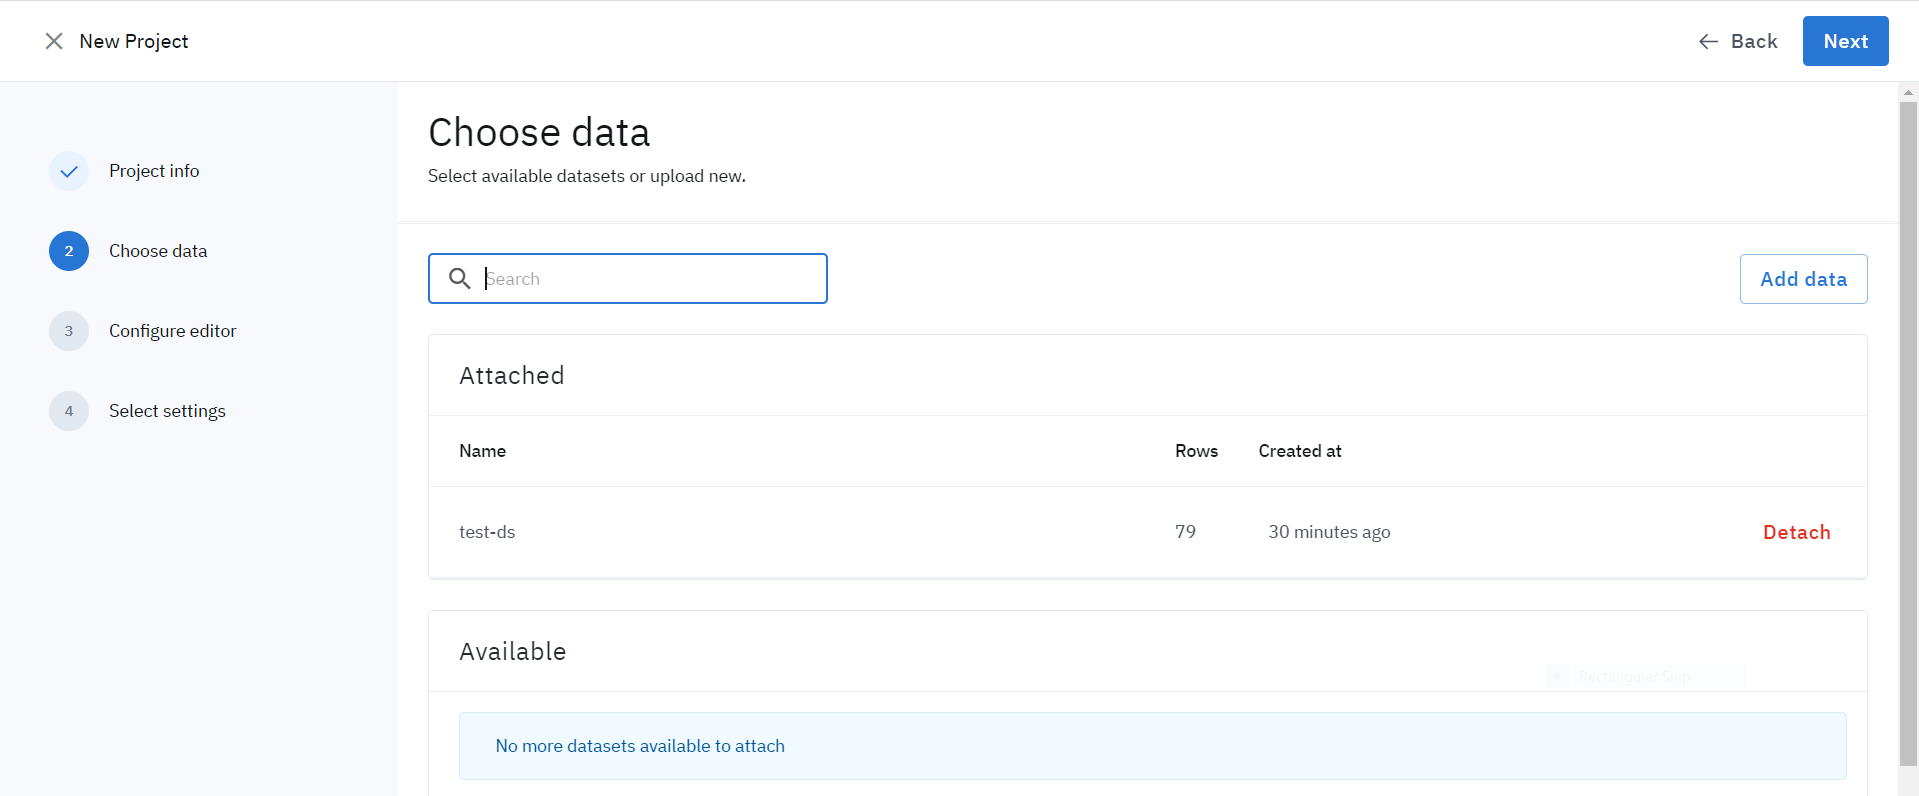

In [ ]:
#choose an editor
#define ontology
#ontology system design 
#feature schema ids 
#organize entire training data 
#define a text to be labelled , reuse it 
#contains the project configuration 
#name of ontology : my-test-project
#define annotation classes
#anytime during the project, go to the ontology congoguration screen 
#we can add or remove annotation classes in the middle of a project 
#ontology is used for the entity recognition of the text 


Export 

